In [31]:
%matplotlib qt

# std
import os
from os import path
import time
import importlib

# 3p
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# prj
os.chdir("..")
from src import helpers, configuration, filtering, bandpower, plots, statistics as stats
from src.configuration import cfg, cfg_mr
os.chdir('analysis-adelie')

# ttest
from scipy.stats import ttest_ind

# plots
import matplotlib

font = {'family':'DejaVu Sans', 'weight':'normal', 'size':14}
matplotlib.rc('font', **font)

## Power spectral density: 1/f shape

In [8]:
len(df_baseline)/300

106.80666666666667

In [89]:
len(df_meditation)/300

286.72

#### Welch's Periodogram all signal, AVG electrode

In [55]:
# Baseline Adélie
# Welch's Periodogram all signal, AVG electrode

df_baseline = helpers.load_signal_data('baseline', subject='adelie', config=cfg)
dsp_df_baseline = stats.get_dsp_welch(df_baseline, epoch_size='109s')

freqs = dsp_shape_baseline.index.get_level_values(1).astype(float)

plt.plot(freqs, dsp_df_baseline['AVG'])

plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectral power density (µV²/Hz)")
plt.title("Welch periodogram for AVG electrode, baseline, Adélie")
plt.show()

In [63]:
# ICI c'est bon
# Baseline Adélie
# Inverted shape of Welch's Periodogram all signal, AVG electrode

dsp_df_baseline = stats.get_dsp_welch(df_baseline, epoch_size='109s')
dsp_shape_baseline = 1 / dsp_df_baseline['AVG']

freqs = dsp_shape_baseline.index.get_level_values(1).astype(float)

# The best fit line over the actual values: slope and intercept
slopes_df = dsp_df_baseline.groupby(level=0).apply(
        lambda x: x.agg(lambda y: np.polyfit(x.index.get_level_values(1).astype(float), 1 / y, 1)[0]))

intercept_df = dsp_df_baseline.groupby(level=0).apply(
        lambda x: x.agg(lambda y: np.polyfit(x.index.get_level_values(1).astype(float), 1 / y, 1)[1]))

abline_values = [slopes_df['AVG'] * i + intercept_df['AVG'] for i in freqs]

# Plot the slope
plt.plot(freqs, abline_values, 'green')

# Plot the inverted shape
plt.plot(freqs, dsp_shape_baseline, 'orange')

plt.title("Inverse of Welch periodogram for AVG electrode, baseline, Adélie")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Inverse of spectral power (Hz/µV²)')

Text(0, 0.5, 'Inverse of spectral power (Hz/µV²)')

In [37]:
length = 50
a = [i + np.random.randint(0, 50) for i in range(length)]
c = np.polyfit(range(length), a, 1)
print(c)
d = [c[1] + c[0] * i for i in range(length)]

plt.plot(a)
plt.plot(d)

[ 0.88969988 28.88235294]


In [36]:
# Meditation Adélie
# Welch's Periodogram all signal, AVG electrode

df_meditation = helpers.load_signal_data('meditation', subject='adelie', config=cfg)
dsp_df_meditation = stats.get_dsp_welch(df_meditation, epoch_size='287s')

freqs = dsp_shape_meditation.index.get_level_values(1).astype(float)

plt.plot(freqs, dsp_df_meditation['AVG'])

plt.xlabel("Frequency (Hz)")
plt.ylabel("Spectral power density (µV²/Hz)")
plt.title("Welch periodogram for AVG electrode, meditation, Adélie")
plt.show()

In [35]:
# Meditation Adélie
# Inverted shape of Welch's Periodogram all signal, AVG electrode

dsp_df_meditation = stats.get_dsp_welch(df_meditation, epoch_size='287s')
dsp_shape_meditation = 1 / dsp_df_meditation['AVG']

# The best fit line over the actual values: slope and intercept
slopes_df = dsp_df_meditation.groupby(level=0).apply(
        lambda x: x.agg(lambda y: np.polyfit(x.index.get_level_values(1).astype(float), 1 / y, 1)[1]))

intercept_df = slopes_df = dsp_df_meditation.groupby(level=0).apply(
        lambda x: x.agg(lambda y: np.polyfit(x.index.get_level_values(1).astype(float), 1 / y, 1)[0]))

abline_values = [slopes_df['AVG'] * i + intercept_df['AVG'] for i in freqs]

# Plot the slope
plt.plot(freqs, abline_values)

# Plot the inverted shape
plt.plot(freqs, dsp_shape_meditation)

plt.title("Inverse of Welch periodogram for AVG electrode, meditation, Adélie")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Inverse of spectral power (Hz/µV²)')

Text(0, 0.5, 'Inverse of spectral power (Hz/µV²)')

#### Welch's Periodogram for one epoch, all electrodes+AVG

In [141]:
# Baseline Adélie
# Welch's Periodogram for one epoch, all electrodes+AVG

df_baseline = helpers.load_signal_data('baseline', subject='adelie', config=cfg)['60s':'70s']
plot_dsp_df_baseline = stats.plot_dsp(df_baseline, title="Welch periodogram for all electrodes, one epoch, baseline, Adélie")

No handles with labels found to put in legend.


In [155]:
dsp_db_baseline = stats.get_dsp_welch(df_baseline)
dsp_shape_baseline = 1 / dsp_db_baseline['AVG']
plt.plot(dsp_shape_baseline.index.get_level_values(1).astype(float), dsp_shape_baseline)

plt.title("Inverse of Welch periodogram for AVG electrode, one epoch, baseline, Adélie")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Inverse of spectral power (Hz/µV²)')

Text(0, 0.5, 'Inverse of spectral power (Hz/µV²)')

No handles with labels found to put in legend.


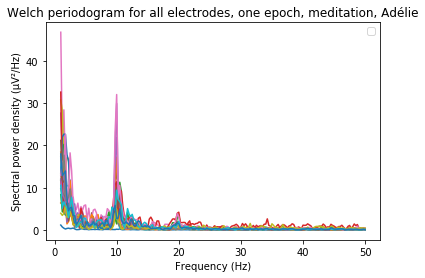

In [39]:
# Meditation Adélie
# Welch's Periodogram for one epoch, all electrodes+AVG

df_meditation = helpers.load_signal_data('meditation', subject='adelie', config=cfg)['60s':'70s']
dsp_db_meditation = stats.plot_dsp(df_meditation, title="Welch periodogram for all electrodes, one epoch, meditation, Adélie")

In [95]:
dsp_db_meditation = stats.get_dsp_welch(df_meditation)
dsp_shape_meditation = 1 / dsp_db_meditation['AVG']
plt.plot(dsp_shape_meditation.index.get_level_values(1).astype(float), dsp_shape_meditation)

plt.title("Inverse of Welch periodogram for AVG electrode, one epoch, meditation, Adélie")
plt.xlabel('Frequency (Hz)')
plt.ylabel('Inverse of spectral power (Hz/µV²)')

Text(0, 0.5, 'Inverse of spectral power (Hz/µV²)')

## Adélie: signal in electrodes, slopes, FWER corrected ttest

In [2]:
def get_concat_signal(data_type, subject="adelie", config=cfg):
    dfs = [
        helpers.load_signal_data(data_type, subject=subject, recording=recording, config=config)
        for recording in range(
            len(config["paths"]["subjects"][subject]["recordings"][data_type])
        )
    ]

    for i in range(len(dfs) - 1):
        dfs[i + 1].index += dfs[i].index.max()

    concatenated = pd.concat(dfs)
    return concatenated

In [3]:
# get baseline Adélie
baseline_adelie = get_concat_signal('baseline')
baseline_adelie_slopes = stats.get_slopes(baseline_adelie)

# get meditation Adélie
meditation_adelie = get_concat_signal('meditation')
meditation_adelie_slopes = stats.get_slopes(meditation_adelie)

In [51]:
# ttest in one electrode
ttest_adelie_slopes_one_elec = ttest_ind(baseline_adelie_slopes['AVG'], meditation_adelie_slopes['AVG'], equal_var=False, nan_policy='omit')

In [4]:
# ttest over all electrodes
concat_adelie_slopes = pd.concat([baseline_adelie_slopes, meditation_adelie_slopes], keys=['baseline', 'meditation'])
ttest_adelie_slopes = concat_adelie_slopes.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))

In [5]:
# FWER corrected ttest: ttest over 20 electrodes
FWER_threshold = 0.05 / 20
p_values_adelie_slopes = ttest_adelie_slopes.map(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to CSV
p_values_adelie_slopes[p_values_adelie_slopes < FWER_threshold].to_csv('p_values_adelie_slopes.csv')
print('The significant pvalues are', p_values_adelie_slopes[p_values_adelie_slopes < FWER_threshold])

The FWER corrected pvalue is 0.0025
The significant pvalues are C3     3.468007e-09
C4     4.477336e-09
F3     1.670347e-06
F7     3.728470e-04
F8     7.259976e-06
Fp1    1.019197e-05
Fp2    4.290368e-04
Fz     2.152294e-03
O1     1.762716e-03
O2     7.922221e-05
T3     4.311543e-08
T4     2.592954e-04
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


## Sam: signal in electrodes, slopes, FWER corrected ttest

In [6]:
# get baseline Sam
baseline_sam = get_concat_signal('baseline', subject='sam')
baseline_sam_slopes = stats.get_slopes(baseline_sam)

# get meditation Sam
meditation_sam = get_concat_signal('meditation', subject='sam')
meditation_sam_slopes = stats.get_slopes(meditation_sam)

In [7]:
# ttest over all electrodes
concat_sam_slopes = pd.concat([baseline_sam_slopes, meditation_sam_slopes], keys=['baseline', 'meditation'])
ttest_sam_slopes = concat_sam_slopes.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))

# FWER corrected ttest: ttest over 20 electrodes
FWER_threshold = 0.05 / 20
p_values_sam_slopes = ttest_sam_slopes.map(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to CSV
p_values_sam_slopes[p_values_sam_slopes < FWER_threshold].to_csv('p_values_sam_slopes.csv')
print('The significant pvalues are', p_values_sam_slopes[p_values_sam_slopes < FWER_threshold])

The FWER corrected pvalue is 0.0025
The significant pvalues are Fp1    0.001624
O2     0.000276
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


In [8]:
# get baseline Sam2
baseline_sam2 = get_concat_signal('baseline', subject='sam2')
baseline_sam2_slopes = stats.get_slopes(baseline_sam2)

# get meditation Sam2
meditation_sam2 = get_concat_signal('meditation', subject='sam2')
meditation_sam2_slopes = stats.get_slopes(meditation_sam2)

In [9]:
# ttest over all electrodes
concat_sam2_slopes = pd.concat([baseline_sam2_slopes, meditation_sam2_slopes], keys=['baseline', 'meditation'])
ttest_sam2_slopes = concat_sam2_slopes.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))

# FWER corrected ttest: ttest over 20 electrodes
FWER_threshold = 0.05 / 20
p_values_sam2_slopes = ttest_sam2_slopes.map(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to CSV
p_values_sam2_slopes[p_values_sam2_slopes < FWER_threshold].to_csv('p_values_sam2_slopes.csv')
print('The significant pvalues are', p_values_sam2_slopes[p_values_sam2_slopes < FWER_threshold])

The FWER corrected pvalue is 0.0025
The significant pvalues are A2     1.951551e-09
F7     3.376951e-04
F8     9.225840e-04
Fp2    2.701059e-04
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


In [10]:
# get baseline Sam3
baseline_sam3 = get_concat_signal('baseline', subject='sam3')
baseline_sam3_slopes = stats.get_slopes(baseline_sam3)

# get meditation Sam3
meditation_sam3 = get_concat_signal('meditation', subject='sam3')
meditation_sam3_slopes = stats.get_slopes(meditation_sam3)

In [11]:
# ttest over all electrodes
concat_sam3_slopes = pd.concat([baseline_sam3_slopes, meditation_sam3_slopes], keys=['baseline', 'meditation'])
ttest_sam3_slopes = concat_sam3_slopes.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))

# FWER corrected ttest: ttest over 20 electrodes
FWER_threshold = 0.05 / 20
p_values_sam3_slopes = ttest_sam3_slopes.map(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to CSV
p_values_sam3_slopes[p_values_sam3_slopes < FWER_threshold].to_csv('p_values_sam3_slopes.csv')
print('The significant pvalues are', p_values_sam3_slopes[p_values_sam3_slopes < FWER_threshold])

The FWER corrected pvalue is 0.0025
The significant pvalues are F3    0.001291
T4    0.000011
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


In [12]:
# get baseline Sam4
baseline_sam4 = get_concat_signal('baseline', subject='sam4')
baseline_sam4_slopes = stats.get_slopes(baseline_sam4)

# get meditation Sam4
meditation_sam4 = get_concat_signal('meditation', subject='sam4')
meditation_sam4_slopes = stats.get_slopes(meditation_sam4)

In [13]:
# ttest over all electrodes
concat_sam4_slopes = pd.concat([baseline_sam4_slopes, meditation_sam4_slopes], keys=['baseline', 'meditation'])
ttest_sam4_slopes = concat_sam4_slopes.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))

# FWER corrected ttest: ttest over 20 electrodes
FWER_threshold = 0.05 / 20
p_values_sam4_slopes = ttest_sam4_slopes.map(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to CSV
p_values_sam4_slopes[p_values_sam4_slopes < FWER_threshold].to_csv('p_values_sam4_slopes.csv')
print('The significant pvalues are', p_values_sam4_slopes[p_values_sam4_slopes < FWER_threshold])

The FWER corrected pvalue is 0.0025
The significant pvalues are C3    2.582811e-07
Cz    7.619580e-04
Fz    9.470340e-07
Pz    8.046499e-08
T3    8.695434e-11
T4    1.720264e-05
T6    1.504465e-03
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


## Raphaël: signal in electrodes, slopes, FWER corrected ttest

In [14]:
# get baseline Raphaël
baseline_rap = get_concat_signal('baseline', subject='raphael')
baseline_rap_slopes = stats.get_slopes(baseline_rap)

# get meditation Raphaël
meditation_rap = get_concat_signal('meditation', subject='raphael')
meditation_rap_slopes = stats.get_slopes(meditation_rap)

In [15]:
# ttest over all electrodes
concat_rap_slopes = pd.concat([baseline_rap_slopes, meditation_rap_slopes], keys=['baseline', 'meditation'])
ttest_rap_slopes = concat_rap_slopes.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))

# FWER corrected ttest: ttest over 20 electrodes
FWER_threshold = 0.05 / 20
p_values_rap_slopes = ttest_rap_slopes.map(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to CSV
p_values_rap_slopes[p_values_rap_slopes < FWER_threshold].to_csv('p_values_rap_slopes.csv')
print('The significant pvalues are', p_values_rap_slopes[p_values_rap_slopes < FWER_threshold])

The FWER corrected pvalue is 0.0025
The significant pvalues are A2    1.297686e-03
C3    2.496099e-07
C4    3.765793e-07
F3    5.184741e-04
P3    1.431436e-03
Pz    4.334675e-04
T4    1.084968e-04
T6    1.551884e-05
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


In [16]:
# get baseline Raphaël2
baseline_rap2 = get_concat_signal('baseline', subject='raphael2')
baseline_rap2_slopes = stats.get_slopes(baseline_rap2)

# get meditation Raphaël2
meditation_rap2 = get_concat_signal('meditation', subject='raphael2')
meditation_rap2_slopes = stats.get_slopes(meditation_rap2)

In [17]:
# ttest over all electrodes
concat_rap2_slopes = pd.concat([baseline_rap2_slopes, meditation_rap2_slopes], keys=['baseline', 'meditation'])
ttest_rap2_slopes = concat_rap2_slopes.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))

# FWER corrected ttest: ttest over 20 electrodes
FWER_threshold = 0.05 / 20
p_values_rap2_slopes = ttest_rap2_slopes.map(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to CSV
p_values_rap2_slopes[p_values_rap2_slopes < FWER_threshold].to_csv('p_values_rap2_slopes.csv')
print('The significant pvalues are', p_values_rap2_slopes[p_values_rap2_slopes < FWER_threshold])

The FWER corrected pvalue is 0.0025
The significant pvalues are A2     2.001900e-04
AVG    1.303453e-06
C3     5.607165e-09
C4     2.941595e-07
Cz     6.033529e-04
F4     1.992932e-07
Fz     1.035927e-04
O1     1.424514e-14
O2     4.140340e-19
P3     6.870454e-12
P4     7.905673e-08
Pz     2.759975e-16
T3     2.779619e-11
T4     7.641286e-06
T5     4.343593e-23
T6     8.213339e-13
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


In [18]:
# get baseline Raphaël3
baseline_rap3 = get_concat_signal('baseline', subject='raphael3')
baseline_rap3_slopes = stats.get_slopes(baseline_rap3)

# get meditation Raphaël3
meditation_rap3 = get_concat_signal('meditation', subject='raphael3')
meditation_rap3_slopes = stats.get_slopes(meditation_rap3)

In [19]:
# ttest over all electrodes
concat_rap3_slopes = pd.concat([baseline_rap3_slopes, meditation_rap3_slopes], keys=['baseline', 'meditation'])
ttest_rap3_slopes = concat_rap3_slopes.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))

# FWER corrected ttest: ttest over 20 electrodes
FWER_threshold = 0.05 / 20
p_values_rap3_slopes = ttest_rap3_slopes.map(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to CSV
p_values_rap3_slopes[p_values_rap3_slopes < FWER_threshold].to_csv('p_values_rap3_slopes.csv')
print('The significant pvalues are', p_values_rap3_slopes[p_values_rap3_slopes < FWER_threshold])

The FWER corrected pvalue is 0.0025
The significant pvalues are A2    1.562433e-04
F4    9.535220e-04
Fz    1.328314e-04
T4    5.216728e-07
T6    2.352834e-09
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  # This is added back by InteractiveShellApp.init_path()


## Arnaud: signal in electrodes, slopes, FWER corrected ttest

In [20]:
# get baseline Arnaud
baseline_arn = get_concat_signal('baseline', subject='arn')
baseline_arn_slopes = stats.get_slopes(baseline_arn)

# get meditation Arnaud
meditation_arn = get_concat_signal('meditation', subject='arn')
meditation_arn_slopes = stats.get_slopes(meditation_arn)

In [21]:
# ttest over all electrodes
concat_arn_slopes = pd.concat([baseline_arn_slopes, meditation_arn_slopes], keys=['baseline', 'meditation'])
ttest_arn_slopes = concat_arn_slopes.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))

In [22]:
# FWER corrected ttest: ttest over 20 electrodes
FWER_threshold = 0.05 / 20
p_values_arn_slopes = ttest_arn_slopes.map(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to CSV
p_values_arn_slopes[p_values_arn_slopes < FWER_threshold].to_csv('p_values_arn_slopes.csv')
print('The significant pvalues are', p_values_arn_slopes[p_values_arn_slopes < FWER_threshold])

The FWER corrected pvalue is 0.0025
The significant pvalues are F7    7.702960e-09
O2    1.691058e-04
Pz    5.914479e-06
T5    5.005683e-11
dtype: float64


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


## MR: signal in electrodes, slopes, FWER corrected ttest

In [32]:
# get baseline MR
baseline_mr = get_concat_signal('baseline', subject='mr', config=cfg_mr)
baseline_mr_slopes = stats.get_slopes(baseline_mr)

# get meditation MR
meditation_mr = get_concat_signal('meditation', subject='mr', config=cfg_mr)
meditation_mr_slopes = stats.get_slopes(meditation_mr)

In [24]:
!cat /proc/sys/vm/overcommit_memory

cat: /proc/sys/vm/overcommit_memory: No such file or directory


In [33]:
# ttest over all electrodes
concat_mr_slopes = pd.concat([baseline_mr_slopes, meditation_mr_slopes], keys=['baseline', 'meditation'])
ttest_mr_slopes = concat_mr_slopes.agg(lambda x: ttest_ind(x.xs('baseline', level=0), x.xs('meditation', level=0), equal_var=False, nan_policy='omit'))

C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [38]:
# FWER corrected ttest: ttest over 20 electrodes
FWER_threshold = 0.05 / 20
p_values_mr_slopes = ttest_mr_slopes.map(lambda x: x[1])
print('The FWER corrected pvalue is', FWER_threshold)

# download to CSV
p_values_mr_slopes[p_values_mr_slopes < FWER_threshold].to_csv('p_values_mr_slopes.csv')
print('The significant pvalues are', p_values_mr_slopes[p_values_mr_slopes < FWER_threshold])

The FWER corrected pvalue is 0.0025
The significant pvalues are AVG        5.130232e-14
E1         5.054062e-22
E10        1.530584e-15
E100       1.975041e-13
E101       1.160346e-10
E102       9.591065e-13
E103       6.793542e-13
E104       1.815678e-13
E105       1.196518e-13
E106       1.449762e-14
E107       6.778794e-14
E108       3.974871e-13
E109       4.644262e-13
E11        2.926047e-09
E110       1.702503e-13
E111       7.967454e-13
E112       3.517917e-13
E113       6.725451e-14
E114       6.567883e-14
E115       7.761986e-14
E116       7.507851e-14
E117       3.139553e-13
E118       1.807907e-13
E119       5.919459e-13
E12        9.624545e-12
E120       3.655662e-13
E121       2.122843e-13
E122       2.063296e-13
E123       2.837165e-14
E124       9.414584e-14
               ...     
E75        1.816495e-14
E76        1.305487e-12
E77        3.371871e-11
E78        1.237184e-11
E79        9.339870e-12
E8         2.176947e-12
E80        1.561218e-12
E81        6.916060e-12


C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: The signature of `Series.to_csv` was aligned to that of `DataFrame.to_csv`, and argument 'header' will change its default value from False to True: please pass an explicit value to suppress this warning.
  import sys


## Get heatmap for values of ratios meditation/baseline slopes 

In [23]:
# compute ratios for fitted slopes meditation/baseline

ratio_slope_ad = pd.DataFrame(meditation_adelie_slopes.mean(axis=0) / baseline_adelie_slopes.mean(axis=0)).rename(columns={0: 'Adélie'})

ratio_slope_sam = pd.DataFrame(meditation_sam_slopes.mean(axis=0) / baseline_sam_slopes.mean(axis=0)).rename(columns={0: 'Sam'})
ratio_slope_sam2 = pd.DataFrame(meditation_sam2_slopes.mean(axis=0) / baseline_sam2_slopes.mean(axis=0)).rename(columns={0: 'Sam2'})
ratio_slope_sam3 = pd.DataFrame(meditation_sam3_slopes.mean(axis=0) / baseline_sam3_slopes.mean(axis=0)).rename(columns={0: 'Sam3'})
ratio_slope_sam4 = pd.DataFrame(meditation_sam4_slopes.mean(axis=0) / baseline_sam4_slopes.mean(axis=0)).rename(columns={0: 'Sam4'})

ratio_slope_rap = pd.DataFrame(meditation_rap_slopes.mean(axis=0) / baseline_rap_slopes.mean(axis=0)).rename(columns={0: 'Raphaël'})
ratio_slope_rap2 = pd.DataFrame(meditation_rap2_slopes.mean(axis=0) / baseline_rap2_slopes.mean(axis=0)).rename(columns={0: 'Raphaël2'})
ratio_slope_rap3 = pd.DataFrame(meditation_rap3_slopes.mean(axis=0) / baseline_rap3_slopes.mean(axis=0)).rename(columns={0: 'Raphaël3'})

ratio_slope_arn = pd.DataFrame(meditation_sam4_slopes.mean(axis=0) / baseline_sam4_slopes.mean(axis=0)).rename(columns={0: 'Arnaud'})

ratio_slope_concat = pd.concat([ratio_slope_ad, ratio_slope_sam, ratio_slope_sam2, ratio_slope_sam3, ratio_slope_sam4, ratio_slope_rap, ratio_slope_rap2, ratio_slope_rap3, ratio_slope_arn], axis=1).applymap(np.log)
ratio_slope_concat

,Adélie,Sam,Sam2,Sam3,Sam4,Raphaël,Raphaël2,Raphaël3,Arnaud
A2,0.166451,0.381992,0.676823,0.002996,-0.418959,0.333185,0.427483,0.547985,-0.418959
AVG,0.195338,-0.259446,0.375724,-0.062127,-0.384066,0.035533,0.400063,0.253048,-0.384066
C3,0.883935,0.217602,0.137267,0.075241,-0.813622,0.459493,0.485649,0.223100,-0.813622
C4,0.775428,-0.233638,0.618260,0.051792,-0.200390,0.363936,0.395516,0.105025,-0.200390
Cz,0.270869,0.174791,0.400757,0.305518,-0.546511,0.175801,0.290928,1.263763,-0.546511
F3,0.527757,0.057583,0.610156,0.418417,0.025962,0.267612,0.161491,0.183085,0.025962
F4,0.392542,0.080154,0.262417,0.005767,-0.272393,-0.023998,0.352978,0.308986,-0.272393
F7,0.587027,0.361512,0.399753,0.146892,-0.091121,0.277803,0.096829,0.141136,-0.091121
F8,0.509619,0.187848,0.444626,0.186399,-0.288060,0.045654,0.172785,0.118359,-0.288060
Fp1,0.488714,0.427809,0.327442,0.912230,-0.219050,-0.054223,-0.169360,-0.109642,-0.219050


In [24]:
# check significant pvalues

pvalues_naive_ad = pd.DataFrame(p_values_adelie_slopes[p_values_adelie_slopes < FWER_threshold]).rename(columns={0: 'Adélie'})

pvalues_naive_sam = pd.DataFrame(p_values_sam_slopes[p_values_sam_slopes < FWER_threshold]).rename(columns={0: 'Sam'})
pvalues_naive_sam2 = pd.DataFrame(p_values_sam2_slopes[p_values_sam2_slopes < FWER_threshold]).rename(columns={0: 'Sam2'})
pvalues_naive_sam3 = pd.DataFrame(p_values_sam3_slopes[p_values_sam3_slopes < FWER_threshold]).rename(columns={0: 'Sam3'})
pvalues_naive_sam4 = pd.DataFrame(p_values_sam4_slopes[p_values_sam4_slopes < FWER_threshold]).rename(columns={0: 'Sam4'})

pvalues_naive_rap = pd.DataFrame(p_values_rap_slopes[p_values_rap_slopes < FWER_threshold]).rename(columns={0: 'Raphaël'})
pvalues_naive_rap2 = pd.DataFrame(p_values_rap2_slopes[p_values_rap2_slopes < FWER_threshold]).rename(columns={0: 'Raphaël2'})
pvalues_naive_rap3 = pd.DataFrame(p_values_rap3_slopes[p_values_rap3_slopes < FWER_threshold]).rename(columns={0: 'Raphaël3'})

pvalues_naive_arn = pd.DataFrame(p_values_arn_slopes[p_values_arn_slopes < FWER_threshold]).rename(columns={0: 'Arnaud'})

pvalues_slope_concat = pd.concat([pvalues_naive_ad, pvalues_naive_sam, pvalues_naive_sam2, pvalues_naive_sam3, pvalues_naive_sam4, pvalues_naive_rap, pvalues_naive_rap2, pvalues_naive_rap3, pvalues_naive_arn], axis=1)
pvalues_slope_concat

C:\Users\adeli\Anaconda3\lib\site-packages\ipykernel_launcher.py:16: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  app.launch_new_instance()


,Adélie,Sam,Sam2,Sam3,Sam4,Raphaël,Raphaël2,Raphaël3,Arnaud
A2,NaN,NaN,1.951551e-09,NaN,NaN,1.297686e-03,2.001900e-04,1.562433e-04,NaN
AVG,NaN,NaN,NaN,NaN,NaN,NaN,1.303453e-06,NaN,NaN
C3,3.468007e-09,NaN,NaN,NaN,2.582811e-07,2.496099e-07,5.607165e-09,NaN,NaN
C4,4.477336e-09,NaN,NaN,NaN,NaN,3.765793e-07,2.941595e-07,NaN,NaN
Cz,NaN,NaN,NaN,NaN,7.619580e-04,NaN,6.033529e-04,NaN,NaN
F3,1.670347e-06,NaN,NaN,0.001291,NaN,5.184741e-04,NaN,NaN,NaN
F4,NaN,NaN,NaN,NaN,NaN,NaN,1.992932e-07,9.535220e-04,NaN
F7,3.728470e-04,NaN,3.376951e-04,NaN,NaN,NaN,NaN,NaN,7.702960e-09
F8,7.259976e-06,NaN,9.225840e-04,NaN,NaN,NaN,NaN,NaN,NaN
Fp1,1.019197e-05,0.001624,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

subjects = ratio_slope_concat.columns.to_list()
ratio_naive = ratio_slope_concat.index.to_list()

array_pvalues_naive_concat = np.array(pvalues_slope_concat)

array_ratio_naive = np.array(ratio_slope_concat)

pre_vmin=ratio_slope_concat.min().min()
pre_vmax=ratio_slope_concat.max().max()

abs_max = max(abs(pre_vmin), abs(pre_vmax))
vmin, vmax = -abs_max, abs_max

fig, ax = plt.subplots()
im = ax.imshow(array_ratio_naive, vmin=vmin, vmax=vmax)

# We want to show all ticks...
ax.set_xticks(np.arange(len(subjects)))
ax.set_yticks(np.arange(len(ratio_naive)))

# ... and label them with the respective list entries
ax.set_xticklabels(subjects)
ax.set_yticklabels(ratio_naive)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(ratio_naive)):
    for j in range(len(subjects)):
        if str(array_pvalues_naive_concat[i, j]) == 'nan':
            text = ax.text(j, i, '', ha="center", va="center", color="w")
        else:
            text = ax.text(j, i, '*', ha="center", va="center", color="k")

ax.set_title("Ratio meditation/baseline for the slopes \n *pvalue < 0.0025")

plt.set_cmap('RdBu')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Log scale', rotation=-90, va="bottom")

fig.tight_layout()
plt.show()

In [39]:
# Matthieu Ricard only

ratio_slope_mr = pd.DataFrame(meditation_mr_slopes.mean(axis=0) / baseline_mr_slopes.mean(axis=0)).rename(columns={0: 'Matthieu Ricard'})
pvalues_naive_mr = pd.DataFrame(p_values_mr_slopes[p_values_mr_slopes < FWER_threshold]).rename(columns={0: 'Matthieu Ricard'})

In [41]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

subjects = ratio_slope_mr.columns.to_list()
ratio_naive = ratio_slope_mr.index.to_list()

array_pvalues_naive_concat = np.array(pvalues_naive_mr)

array_ratio_naive = np.array(ratio_slope_mr)

fig, ax = plt.subplots()
im = ax.imshow(array_ratio_naive)

# We want to show all ticks...
ax.set_xticks(np.arange(len(subjects)))
ax.set_yticks(np.arange(len(ratio_naive)))

# ... and label them with the respective list entries
ax.set_xticklabels(subjects)
ax.set_yticklabels(ratio_naive)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(ratio_naive)):
    for j in range(len(subjects)):
        if str(array_pvalues_naive_concat[i, j]) == 'nan':
            text = ax.text(j, i, '', ha="center", va="center", color="w")
        else:
            text = ax.text(j, i, '*', ha="center", va="center", color="k")

ax.set_title("Ratio meditation/baseline for the slopes \n *pvalue < 0.0025")

plt.set_cmap('RdBu')

cbar = ax.figure.colorbar(im, ax=ax)
cbar.ax.set_ylabel('Log scale', rotation=-90, va="bottom")

fig.tight_layout()
plt.show()

IndexError: index 257 is out of bounds for axis 0 with size 257

## Let's animate the welch periodogram

In [37]:
psd = stats.get_dsp_welch(helpers.load_signal_data("baseline", config=cfg, subject='adelie'), epoch_size='4s')
psd.head()

A2        AVG         C3         C4         Cz  \
00:00:09.991072 1.00  0.960440   1.932948   3.906442   5.060188  49.360073   
                1.25  0.415009  34.300112  39.477347  24.689440  63.970273   
                1.50  0.047441  25.411044  44.744947  21.280163  28.262125   
                1.75  0.159956   0.810664   0.817227   2.207108   0.823415   
                2.00  0.139585   2.277048  13.786360   3.677157   5.266234   

                             F3          F4         F7         F8        Fp1  \
00:00:09.991072 1.00  11.564177   22.241432  12.904437   6.548312  14.855838   
                1.25  51.757166  133.702267  96.689173  58.299157  75.454290   
                1.50  19.414765  129.597375  44.694218  37.682253  43.733517   
                1.75   3.468835   64.260621   3.695244   0.574181   3.871877   
                2.00   4.712729    9.420356   3.883453   0.232989   1.245614   

                      ...         Fz         O1         O2         P3  \
00:00:09.991072 1.00  ...   5.954402   1.072496  27.032049  40.424704   
                1.25  ...  46.087190  10.594399  48.347180  28.851662   
                1.50  ...  39.977972  15.703335  34.241434  13.336551   
                1.75  ...   3.454433   4.476083  31.775274   1.658809   
                2.00  ...   4.135805   6.911569   8.245376   6.253878   

                             P4          Pz         T3         T4         T5  \
00:00:09.991072 1.00  28.324630   78.110312   8.545232   1.019636   9.807025   
                1.25  48.916572   86.046643  11.508428  10.190834  23.268254   
                1.50  22.339054  140.022706   2.325799   6.635201  30.655105   
                1.75   7.157585   36.748422   0.869467   1.804938   3.066903   
                2.00   6.657723    7.257102   0.458657   8.424098  12.181189   

                             T6  
00:00:09.991072 1.00  22.421323  
                1.25  67.858778  
                1.50  53.243323  
                1.75   5.125031  
                2.00   2.252611  

[5 rows x 21 columns]

In [77]:
psd.index.levels[0]

TimedeltaIndex(['00:00:09.991072', '00:00:13.991072', '00:00:17.991072',
                '00:00:21.991072', '00:00:25.991072', '00:00:29.991072',
                '00:00:33.991072', '00:00:37.991072', '00:00:41.991072',
                '00:00:45.991072', '00:00:49.991072', '00:00:53.991072',
                '00:00:57.991072', '00:01:01.991072', '00:01:05.991072',
                '00:01:09.991072', '00:01:13.991072', '00:01:17.991072',
                '00:01:21.991072', '00:01:25.991072', '00:01:29.991072',
                '00:01:33.991072', '00:01:37.991072', '00:01:41.991072',
                '00:01:45.991072', '00:01:49.991072', '00:01:53.991072',
                '00:01:57.991072'],
               dtype='timedelta64[ns]', freq='4S')

In [89]:
import matplotlib.animation as animation
    
fig = plt.figure()

def animate(group_index):
    plt.clf()
    group = psd.xs(group_index, level=0)
    axes = group['AVG'].plot()
    axes.set_ylim([0,100])
    return axes


anim = animation.FuncAnimation(fig, animate, frames=psd.index.levels[0], repeat = False, interval=300, blit=False)